In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

## Read input

In [11]:
df = pd.read_excel('Table_S1-Archaea_bins.xlsx')

# add prokka results
cds = pd.read_csv('input/cds.csv', sep=':', header=None, names=['name', 'cds']).drop('name', axis=1)
tRNA = pd.read_csv('input/tRNA.csv', sep=':', header=None, names=['name', 'tRNA']).drop('name', axis=1)
crispr = pd.read_csv('input/crispr.csv', sep=':', header=None, names=['name', 'crispr']).drop('name', axis=1)
cont = pd.read_csv('input/cont.csv', sep=':', header=None, names=['name', 'cont']).drop('name', axis=1)
# join all 
fn = cds.join(tRNA).join(crispr).join(cont)
#fn.to_excel('results/prokka.xlsx')

fn.reset_index(inplace=True)
fn.rename(columns={'index': 'bin_name'}, inplace=True)
fn['bin_name'] = fn['bin_name'].str.split('/').str[1]
# chance txt to fa
fn['bin_name'] = fn['bin_name'].str.replace('txt', 'fa')
fn = fn.fillna(0)

# join with df
df = df.join(fn.set_index('bin_name'), on='bin_name')
df.to_excel('results/FINAL_table.xlsx')
df.head(2)  

,bin_name,bin_qual,completeness,contamination,domain,phylum,class,order,family,genus,...,length,file,num_seqs,avg_len,N50,GC(%),cds,tRNA,crispr,cont
0,V4AA4Y_maxbin.210_sub.fa,MQ,72.23,9.08,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,...,1930707,V4AA4Y_maxbin.210_sub.fa,1853,1041.9,1125,59.21,2521,30,0.0,1853
1,VZR2LZ_vamb.232152_sub.fa,MQ,70.51,8.99,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,...,1454968,VZR2LZ_vamb.232152_sub.fa,456,3190.7,3973,60.69,1815,38,0.0,456


In [6]:
print('Median completeness is: ',df['completeness'].median())
print('Median contamination is: ',df['contamination'].median())

Median completeness is:  98.035
Median contamination is:  0.52


In [7]:
df.value_counts('order')

order
Methanomassiliicoccales    191
Methanobacteriales          83
dtype: int64

In [9]:
df[df['order'] == 'Methanobacteriales'].value_counts('genus')

genus
Methanobrevibacter_A    83
dtype: int64

In [8]:
df[df['order'] == 'Methanomassiliicoccales'].value_counts('genus')

genus
UBA71                      119
Methanomethylophilus        41
MX-02                       15
Methanomassiliicoccus_A     13
DTU008                       3
dtype: int64

# Fig.1. An overview of the EstMB MAGdb 

In [3]:
# input BGI 
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])

# read meta data
meta = pd.read_excel('input/EstMB_phenotype_data.xlsx', index_col=False)
metaC = meta[['gender', 'Age_at_MBsample', 'BMI']]
metaC2 = meta[['health_status_mapeada', 'birthPlace_typeCity', 'specialDietFollowing']]

In [4]:
bgi['BGI_reads_numb'].median()

53037082.0

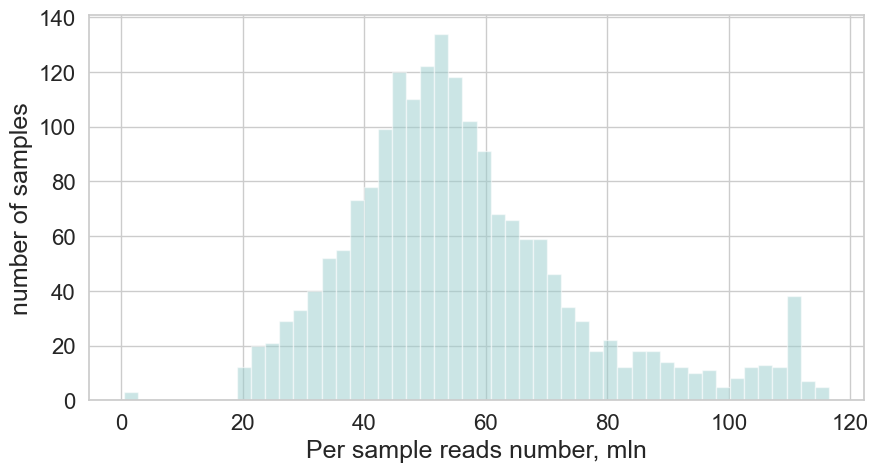

In [32]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")

plt.hist(bgi['BGI_reads_numb']/1000000, bins=50, color='#99CCCD', alpha=0.5)
plt.xlabel('Per sample reads number, mln', fontsize=18)
plt.ylabel('number of samples', fontsize=18)
# label size
plt.tick_params(labelsize=16)
plt.savefig('results/paper/Fig1a_ReadsNumb.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_ReadsNumb.png', bbox_inches='tight')

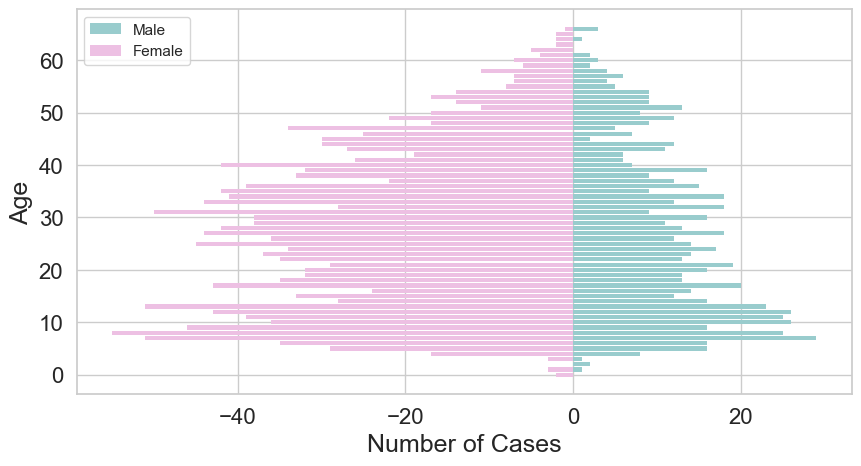

In [33]:
sns.set_theme(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaC.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index(drop=True)

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.index, age_counts[0], label='Male', color='#99CCCD', linewidth=0.01)
ax.barh(age_counts.index, -age_counts[1], label='Female', color='#edc0e3', linewidth=0.01)
ax.set_xlabel('Number of Cases', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
plt.savefig('results/paper/Fig1a_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pyramid.png', bbox_inches='tight')

plt.show()

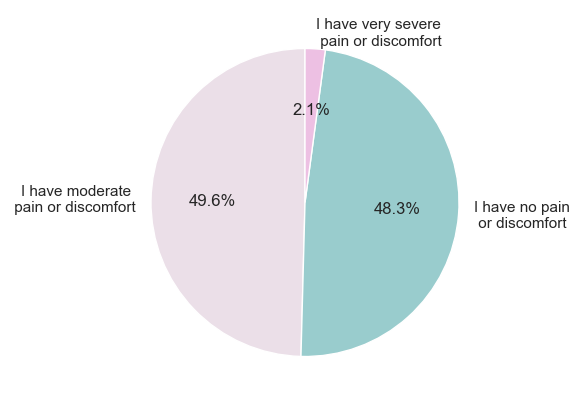

In [34]:
# create a pie chart
plt.figure(figsize=(5, 5))

#labels=metaC2['health_status_mapeada'].value_counts().index
labels=['I have moderate \n pain or discomfort','I have no pain \n or discomfort','I have very severe \n pain or discomfort']

plt.pie(metaC2['health_status_mapeada'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ebdfe8','#99CCCD', '#edc0e3'])

plt.savefig('results/paper/Fig1a_Pie1.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pie1.png', bbox_inches='tight')

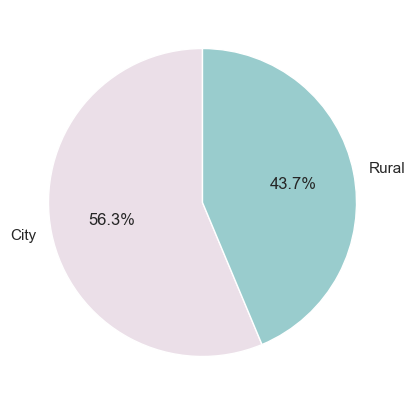

In [35]:
# create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(metaC2['birthPlace_typeCity'].value_counts(), labels=['City','Rural'], autopct='%1.1f%%', startangle=90, colors=['#ebdfe8','#99CCCD', '#edc0e3'])

plt.savefig('results/paper/Fig1a_Pie2.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pie2.png', bbox_inches='tight')

# Fig.2. Description of final set of Archaea MAGs 

In [10]:
import plotly.io as pio 
# all db taxa
fig = px.sunburst(
    df,
    path=['phylum', 'class', 'order', 'family', 'genus','sp'],
    #values='number_of_bins_per_cluster',
    title="All species, \n GTDB, release214",
    color='class',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("results/paper/Fig2_Archaea_taxa2.html")
pio.write_image(fig, "results/paper/Fig2_Archaea_taxa2.svg") 

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning:

8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



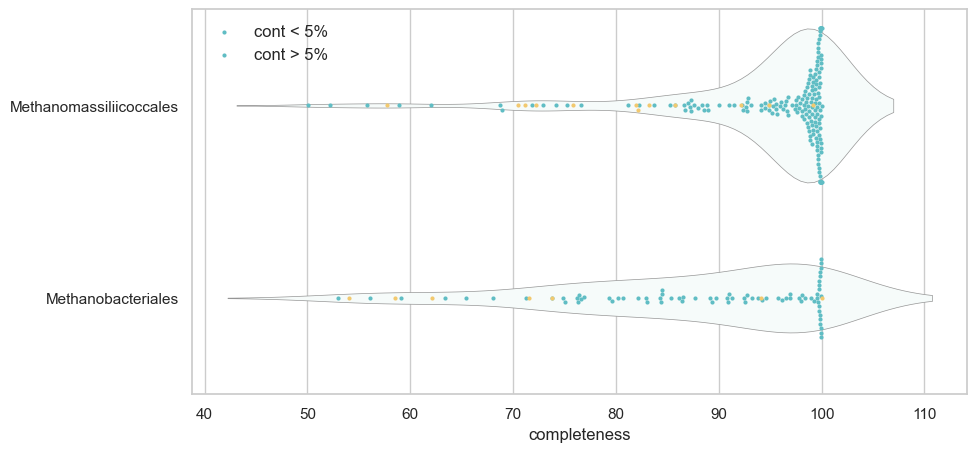

In [15]:
df = df[df['completeness'] > 10]
# data slice
df['length2'] = df['length']/1000000
df1 = df[df['contamination'] < 5]
df2 = df[df['contamination'] >= 5]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(y="order", x="completeness", data=df1, size=3, color='#60BDC4')
ax = sns.swarmplot(y="order", x="completeness", data=df2, size=3, color='#F2C96F')

ax = sns.violinplot(y="order", x="completeness", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')

plt.savefig('results/paper/Fig2_completness_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/paper/Fig2_completness_cm2.svg', bbox_inches='tight')



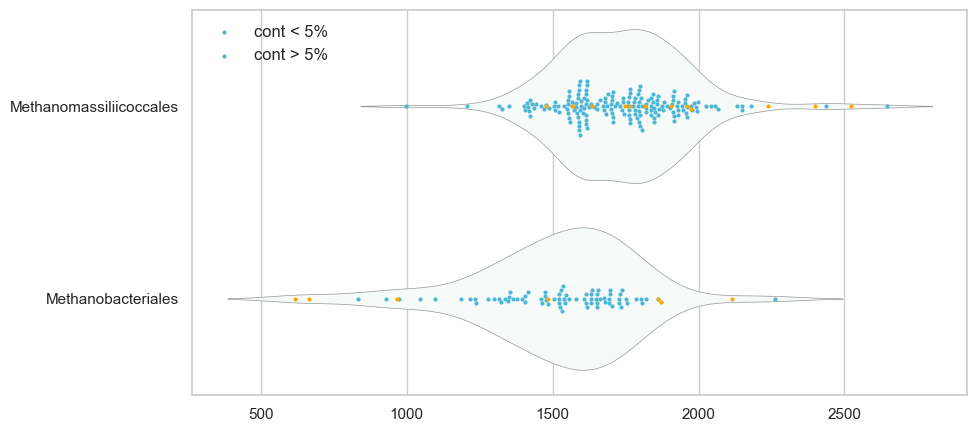

In [20]:
df1 = df[df['contamination'] < 5]
df2 = df[df['contamination'] >= 5]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="cds", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="cds", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="cds", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.savefig('results/Fig3_cds.png', dpi=300, bbox_inches='tight')

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


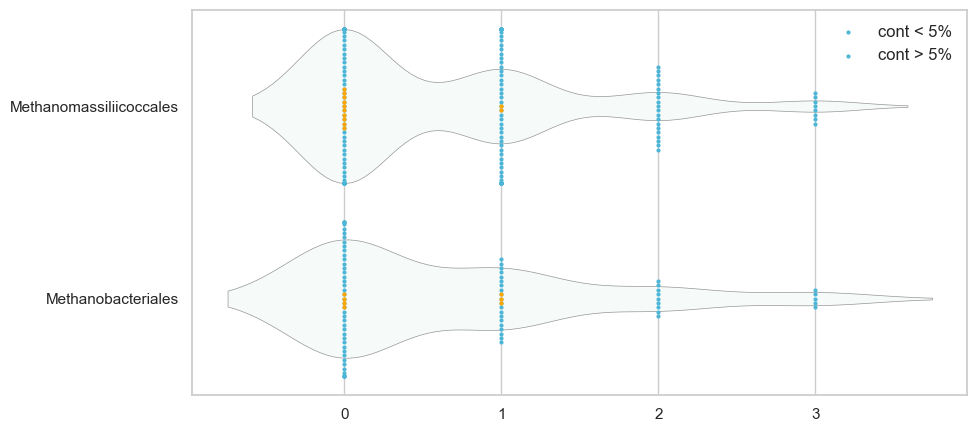

In [25]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="crispr", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="crispr", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="crispr", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.savefig('results/Fig3_crispr.png', dpi=300, bbox_inches='tight')

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


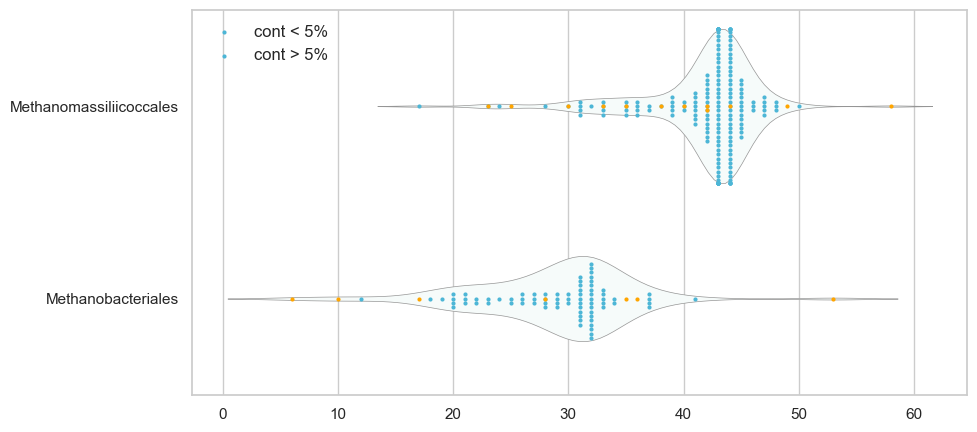

In [22]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="tRNA", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="tRNA", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="tRNA", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.savefig('results/Fig3_tRNA.png', dpi=300, bbox_inches='tight')

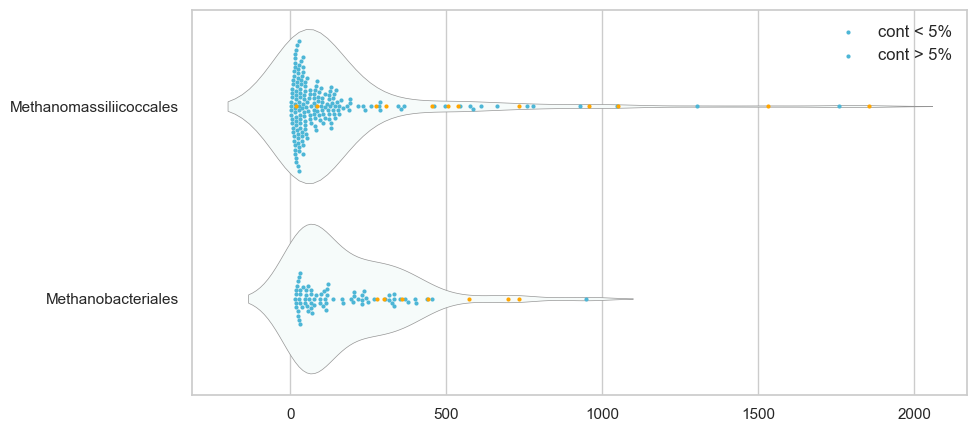

In [24]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="cont", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="cont", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="cont", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.savefig('results/Fig3_cont.png', dpi=300, bbox_inches='tight')